<H1>MAPK8IP3 genotype phenotype correlations</H1>

In [1]:
import hpotk
import genophenocorr

from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder
from genophenocorr.model import VariantEffect
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.analysis.predicate import PatientCategories

from IPython.display import display, HTML

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f'hpotk version {hpotk.__version__}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

Loaded HPO v2023-10-09
hpotk version 0.5.0
Using genophenocorr version 0.1.1dev


### Setup

Here we specificy the path to the folder with the phenopackets to be analyzed, and the transcript to be used for the analysis (in general, the MANE transcript should be used). Here, we use the transcript `NM_001318852.2` which is the MANE transcript of the *MAPK8IP3* gene.

In [2]:
fpath_phenopackets = 'phenopackets'
MAPK8IP3_id = 'NM_001318852.2'

### Create the cohort



In [3]:
from genophenocorr.view import CohortViewable

cohort_creator = configure_caching_cohort_creator(hpo)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)
cv = CohortViewable(hpo=hpo)
html = cv.process(cohort=cohort, transcript_id=MAPK8IP3_id)

display(HTML(html))

Patients Created: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 367.07it/s]
Validated under none policy
No errors or warnings were found


HPO Term,ID,Annotation Count
Global developmental delay,HP:0001263,19
Hypotonia,HP:0001252,11
Thin corpus callosum,HP:0033725,9
"Intellectual disability, moderate",HP:0002342,7
Spastic diplegia,HP:0001264,6
Intellectual disability,HP:0001249,6
Seizure,HP:0001250,6
Delayed ability to walk,HP:0031936,6
Cerebral atrophy,HP:0002059,5
Thin upper lip vermilion,HP:0000219,5


<Axes: title={'center': 'C-Jun-amino-terminal kinase-interacting protein 3\ntranscript: NM_001318852.2, protein: NP_055948.2'}>

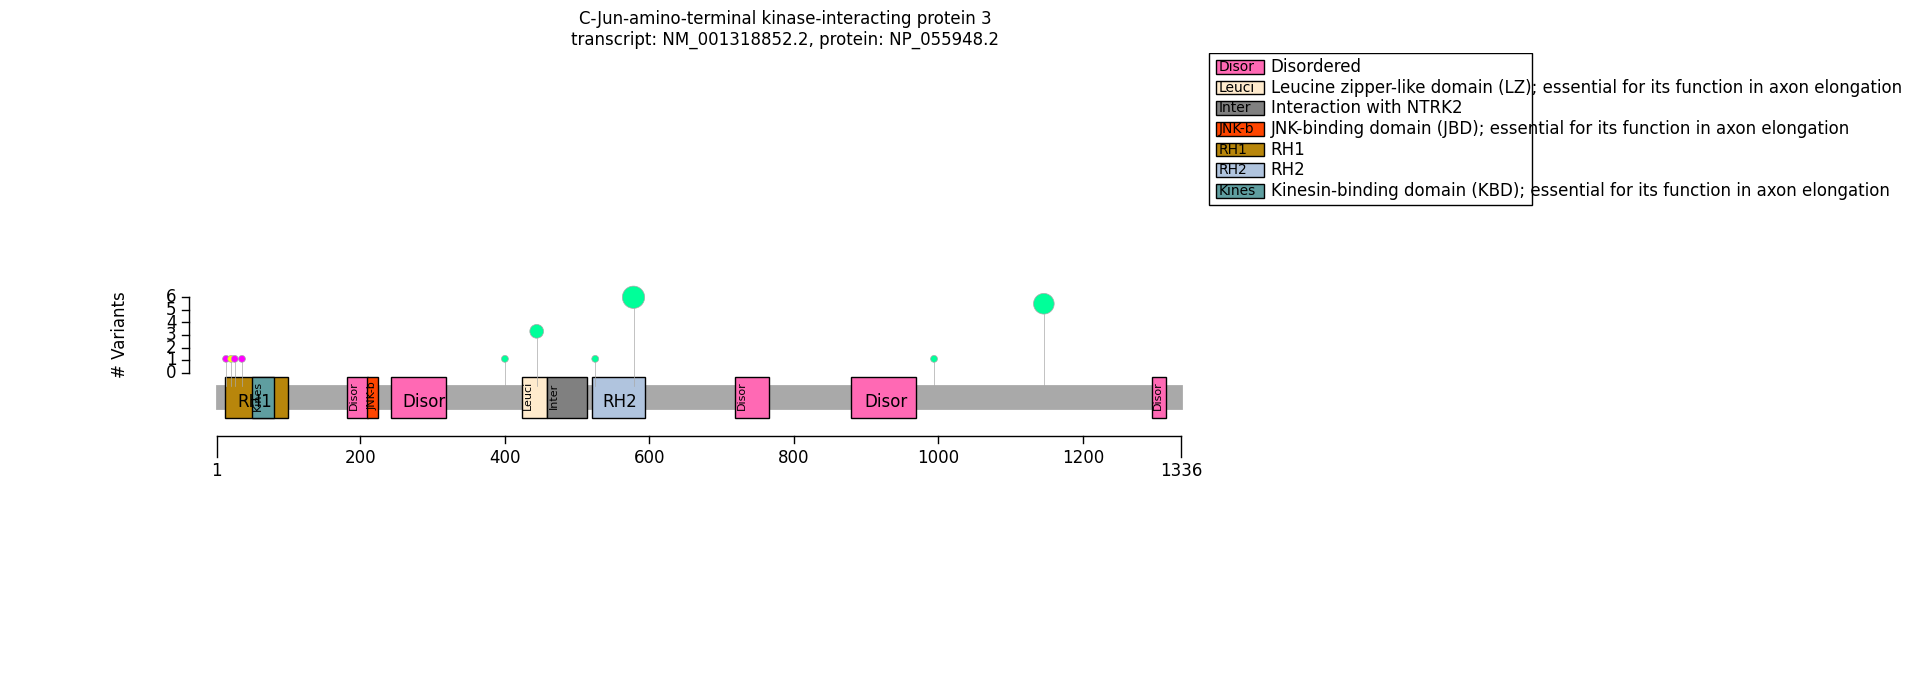

In [5]:
from genophenocorr.preprocessing import UniprotProteinMetadataService
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVMultiCoordinateService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate('NP_055948.2')
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(MAPK8IP3_id)
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate('NP_055948.2')
from genophenocorr.view import ProteinVisualizable, ProteinVisualizer
protein_meta = protein_metas
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Configure the analysis
For the first run, we will not remove unneeded terms prior to statistical analysis

In [6]:
analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.heuristic_strategy(threshold_HPO_observed_frequency=0.25)
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [7]:
frameshift = analysis.compare_by_variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=MAPK8IP3_id)
frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_001318852.2      Yes             No          \
                                        Count Percent  Count Percent   
Abnormality of movement [HP:0100022]      0/1      0%   8/13     62%   
Cerebral palsy [HP:0100021]               0/1      0%   3/13     23%   
Seizure [HP:0001250]                      0/1      0%   6/17     35%   
Cerebral visual impairment [HP:0100704]   0/1      0%    2/6     33%   
Hypotonia [HP:0001252]                    1/1    100%  10/17     59%   
Inability to walk [HP:0002540]            0/1      0%   4/10     40%   
Gait disturbance [HP:0001288]             0/1      0%   5/10     50%   
Autistic behavior [HP:0000729]            1/1    100%    3/6     50%   

FRAMESHIFT_VARIANT on NM_001318852.2                                 
                                          p value Corrected p value  
Abnormality of movement [HP:0100022]     0.428571               1.0  
Cerebral palsy [HP:0100021]              1.000000               1.0  
Seizure [HP:0001250]                     1.000000               1.0  
Cerebral visual impairment [HP:0100704]  1.000000               1.0  
Hypotonia [HP:0001252]                   1.000000               1.0  
Inability to walk [HP:0002540]           1.000000               1.0  
Gait disturbance [HP:0001288]            1.000000               1.0  
Autistic behavior [HP:0000729]           1.000000               1.0

In [8]:
from genophenocorr.view import StatsViewer

sv = StatsViewer()

display(HTML(sv.process(hpo_mtc_report=frameshift.mtc_filter_report)))

Reason,Count
Skipping term with only 1 observations (not powered for 2x2),150
Skipping term with only 2 observations (not powered for 2x2),33
Skipping term with only 3 observations (not powered for 2x2),27
Skipping term because one genotype had zero observations,22
Skipping term with only 4 observations (not powered for 2x2),17
Skipping term with only 6 observations (not powered for 2x2),15
Skipping term because all genotypes have same HPO observed proportions,14
Skipping term with only 5 observations (not powered for 2x2),12
Skipping top level term,12
Skipping term because no genotype has more than one observed HPO count,3


In [9]:
frameshift = analysis.compare_by_variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=MAPK8IP3_id)
frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_001318852.2      Yes             No          \
                                        Count Percent  Count Percent   
Abnormality of movement [HP:0100022]      0/1      0%   8/13     62%   
Cerebral palsy [HP:0100021]               0/1      0%   3/13     23%   
Seizure [HP:0001250]                      0/1      0%   6/17     35%   
Cerebral visual impairment [HP:0100704]   0/1      0%    2/6     33%   
Hypotonia [HP:0001252]                    1/1    100%  10/17     59%   
Inability to walk [HP:0002540]            0/1      0%   4/10     40%   
Gait disturbance [HP:0001288]             0/1      0%   5/10     50%   
Autistic behavior [HP:0000729]            1/1    100%    3/6     50%   

FRAMESHIFT_VARIANT on NM_001318852.2                                 
                                          p value Corrected p value  
Abnormality of movement [HP:0100022]     0.428571               1.0  
Cerebral palsy [HP:0100021]              1.000000               1.0  
Seizure [HP:0001250]                     1.000000               1.0  
Cerebral visual impairment [HP:0100704]  1.000000               1.0  
Hypotonia [HP:0001252]                   1.000000               1.0  
Inability to walk [HP:0002540]           1.000000               1.0  
Gait disturbance [HP:0001288]            1.000000               1.0  
Autistic behavior [HP:0000729]           1.000000               1.0

In [10]:
html = sv.process(hpo_mtc_report=frameshift.mtc_filter_report)

display(HTML(html))

Reason,Count
Skipping term with only 1 observations (not powered for 2x2),150
Skipping term with only 2 observations (not powered for 2x2),33
Skipping term with only 3 observations (not powered for 2x2),27
Skipping term because one genotype had zero observations,22
Skipping term with only 4 observations (not powered for 2x2),17
Skipping term with only 6 observations (not powered for 2x2),15
Skipping term because all genotypes have same HPO observed proportions,14
Skipping term with only 5 observations (not powered for 2x2),12
Skipping top level term,12
Skipping term because no genotype has more than one observed HPO count,3


## Correlation analysis for c.1735C>T

`NM_001318852.2:c.1735C>T` is the most commonly encountered variant in our cohort. In the following code, we investigate whether this variant displays significant genotype-phenotype correlations.

For the purpose of the analysis, the variant is denoted by its key: `16_1762843_1762843_C_T`.

In [11]:
variant_key = '16_1762843_1762843_C_T'
by_variant = analysis.compare_by_variant_key(variant_key=variant_key)
by_variant.summarize(hpo, PatientCategories.YES)

>=1 allele of the variant 16_1762843_1762843_C_T   Yes            No          \
                                                 Count Percent Count Percent   
Seizure [HP:0001250]                               4/5     80%  2/13     15%   
Inability to walk [HP:0002540]                     3/3    100%   1/8     12%   
Autistic behavior [HP:0000729]                     0/3      0%   4/4    100%   
Gait disturbance [HP:0001288]                      3/3    100%   2/8     25%   
Abnormality of movement [HP:0100022]               4/4    100%  4/10     40%   
Hypotonia [HP:0001252]                             2/5     40%  9/13     69%   
Thin corpus callosum [HP:0033725]                  6/6    100%   3/4     75%   
Anteverted nares [HP:0000463]                      0/3      0%   2/4     50%   
Short philtrum [HP:0000322]                        0/3      0%   2/4     50%   
Spastic diplegia [HP:0001264]                      4/4    100%   2/3     67%   
Prominent nasal bridge [HP:0000426]                1/3     33%   3/4     75%   
Autism [HP:0000717]                                0/5      0%  2/10     20%   
Cerebral palsy [HP:0100021]                        1/4     25%  2/10     20%   

>=1 allele of the variant 16_1762843_1762843_C_T                              
                                                   p value Corrected p value  
Seizure [HP:0001250]                              0.021709          0.123810  
Inability to walk [HP:0002540]                    0.024242          0.123810  
Autistic behavior [HP:0000729]                    0.028571          0.123810  
Gait disturbance [HP:0001288]                     0.060606          0.196970  
Abnormality of movement [HP:0100022]              0.084915          0.220779  
Hypotonia [HP:0001252]                            0.325980          0.557143  
Thin corpus callosum [HP:0033725]                 0.400000          0.557143  
Anteverted nares [HP:0000463]                     0.428571          0.557143  
Short philtrum [HP:0000322]                       0.428571          0.557143  
Spastic diplegia [HP:0001264]                     0.428571          0.557143  
Prominent nasal bridge [HP:0000426]               0.485714          0.567460  
Autism [HP:0000717]                               0.523810          0.567460  
Cerebral palsy [HP:0100021]                       1.000000          1.000000

TODO - finalize!